# Análise de dados - ENEM

Nesse trabalho realizamos algumas análises em cima dos dados disponibilizados pelo INEP referente aos microdados do Exame Nacional do Ensino Médio (ENEM).
Para facilitar o acesso aos dados via Colab, utilizamos o Google Drive para armazenar todos os dados necessários para a análise, segue o link: https://drive.google.com/drive/folders/16axFmbN0hMEaYS3lgMjLq8jhXdhRGSPf?usp=sharing 

Integrantes:

Igor de Brito Coura 19.00165-7

Lucas Ribeiro Gonçalves RA: 19.00194-0

Luiz Felipe de Oliveira Rodrigues 19.00574-0

Mateus Silva Souza 19.01309-4

Vinicius Savrutsky Ivankovich 19.01014-0

In [1]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Fazendo download dos arquivos
import gdown

url = 'https://drive.google.com/drive/folders/16axFmbN0hMEaYS3lgMjLq8jhXdhRGSPf?usp=sharingg'
output_path = 'graph_ML.pk'
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/Microdados/Apresentação-Analise_de_dados.docx',
 '/content/Microdados/bcim_2016_21_11_2018.gpkg',
 '/content/Microdados/MICRODADOS_ENEM_2018.csv',
 '/content/Microdados/MICRODADOS_ENEM_2019.csv',
 '/content/Microdados/MICRODADOS_ENEM_2020.csv',
 '/content/Microdados/MICRODADOS_ENEM_2021.csv',
 '/content/Microdados/MICRODADOS_ENEM_2022.csv']

# Imports

In [4]:
!pip install geopandas

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import geopandas as gpd



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 99.4 MB/s eta 0:00:00


# Dataframes

In [5]:
# Para não estourar o limite de memória RAM do Colab por conta de serem dataframes gigantescos, foram selecionadas apenas as colunas necessárias para a análise.
colunas_uteis = ["TP_SEXO","TP_COR_RACA","TP_FAIXA_ETARIA", "SG_UF_ESC", "CO_MUNICIPIO_PROVA","NU_NOTA_CH", "NU_NOTA_REDACAO","NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_LC", "Q006", "Q001", "Q002", "TP_ESCOLA", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC", "SG_UF_PROVA"]

microdados2018 = pd.read_csv('/content/Microdados/MICRODADOS_ENEM_2018.csv', sep=';', encoding='latin1', usecols=colunas_uteis)
microdados2019 = pd.read_csv('/content/Microdados/MICRODADOS_ENEM_2019.csv', sep=';', encoding='latin1', usecols=colunas_uteis)
microdados2020 = pd.read_csv('/content/Microdados/MICRODADOS_ENEM_2020.csv', sep=';', encoding='latin1', usecols=colunas_uteis)
microdados2021 = pd.read_csv('/content/Microdados/MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin1', usecols=colunas_uteis)
microdados2022 = pd.read_csv('/content/Microdados/MICRODADOS_ENEM_2022.csv', sep=';', encoding='latin1', usecols=colunas_uteis)

# Evolução ao longo dos anos por região em cada matéria

Foi feita uma análise quanto a evolução das notas por região dos últimos 5 anos, e como é possível notar nos gráficos gerados, as regiões Sudeste e Sul tiveram as maiores médias. Entretanto, houve uma queda na média das notas por área de conhecimento entre 2018 e 2019 onde, realizando uma pesquisa, concluímos que pode ter sido causada pelo contexto socioeconômico e político desse período. O país enfrentava um alto índice de desemprego entre os jovens e havia uma alta polarização política, podendo assim ter afetado o desempenho dos estudantes.
Nesse período também estava em progresso a reforma do ensino médio, que juntamente pode ter influenciado na queda das médias, porém percebe-se uma tendência do aumento dessas notas de lá pra cá, principalmente em redação que não deixou de subir a média nos últimos 5 anos.

In [6]:
#Selecionar as colunas de interesse (notas por matéria, região e tipo de escola)
colunas_materias = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
colunas_nomes_materias = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática']
coluna_regiao = 'CO_MUNICIPIO_PROVA'
coluna_tipo_escola = 'TP_ESCOLA'

#Mapear as regiões com base nos dois primeiros dígitos do código do município presentes em coluna_regiao
cod_regioes = {
    '11': 'Norte',
    '12': 'Norte',
    '13': 'Norte',
    '14': 'Norte',
    '15': 'Norte',
    '16': 'Norte',
    '17': 'Norte',
    '21': 'Nordeste',
    '22': 'Nordeste',
    '23': 'Nordeste',
    '24': 'Nordeste',
    '25': 'Nordeste',
    '26': 'Nordeste',
    '27': 'Nordeste',
    '28': 'Nordeste',
    '29': 'Nordeste',
    '31': 'Sudeste',
    '32': 'Sudeste',
    '33': 'Sudeste',
    '35': 'Sudeste',
    '41': 'Sul',
    '42': 'Sul',
    '43': 'Sul',
    '50': 'Centro-Oeste',
    '51': 'Centro-Oeste',
    '52': 'Centro-Oeste',
    '53': 'Centro-Oeste',
}


anos = ['2018', '2019', '2020', '2021', '2022']
 
# Lista das regiões
regioes = ['Centro-Oeste', 'Sul', 'Sudeste', 'Nordeste', 'Norte']


# Dicionário para armazenar os dados de notas por matéria e região
dados_notas = {'Ciências da Natureza': {'Centro-Oeste':[],'Sul':[],'Sudeste':[],'Nordeste':[],'Norte':[]},
               'Ciências Humanas': {'Centro-Oeste':[],'Sul':[],'Sudeste':[],'Nordeste':[],'Norte':[]},
               'Linguagens e Códigos': {'Centro-Oeste':[],'Sul':[],'Sudeste':[],'Nordeste':[],'Norte':[]},
               'Matemática': {'Centro-Oeste':[],'Sul':[],'Sudeste':[],'Nordeste':[],'Norte':[]},
               'Redação': {'Centro-Oeste':[],'Sul':[],'Sudeste':[],'Nordeste':[],'Norte':[]}}

# Loop para iterar entre as regiões e logo em seguida entre os anos de cada microdado:
for regiao in regioes:
    for ano in anos:

        # Carregar os dados de cada dataframe
        dados_enem = eval(f'microdados{ano}')
        dados_enem['Região'] = dados_enem[coluna_regiao].astype(str).str[:2].map(cod_regioes)

        # Filtrar os dados por região
        dados_regiao = dados_enem[dados_enem['Região'].str.contains(regiao)]

        # Calcular a média das notas por matéria
        media_ciencias_natureza = dados_regiao['NU_NOTA_CN'].mean()
        media_ciencias_humanas = dados_regiao['NU_NOTA_CH'].mean()
        media_linguagens = dados_regiao['NU_NOTA_LC'].mean()
        media_matematica = dados_regiao['NU_NOTA_MT'].mean()
        media_redacao = dados_regiao['NU_NOTA_REDACAO'].mean()
        
        # Armazenar as médias no dicionário de dados_notas
        dados_notas['Ciências da Natureza'][regiao].append(media_ciencias_natureza)
        dados_notas['Ciências Humanas'][regiao].append(media_ciencias_humanas)
        dados_notas['Linguagens e Códigos'][regiao].append(media_linguagens)
        dados_notas['Matemática'][regiao].append(media_matematica)
        dados_notas['Redação'][regiao].append(media_redacao)


# Plot dos resultados

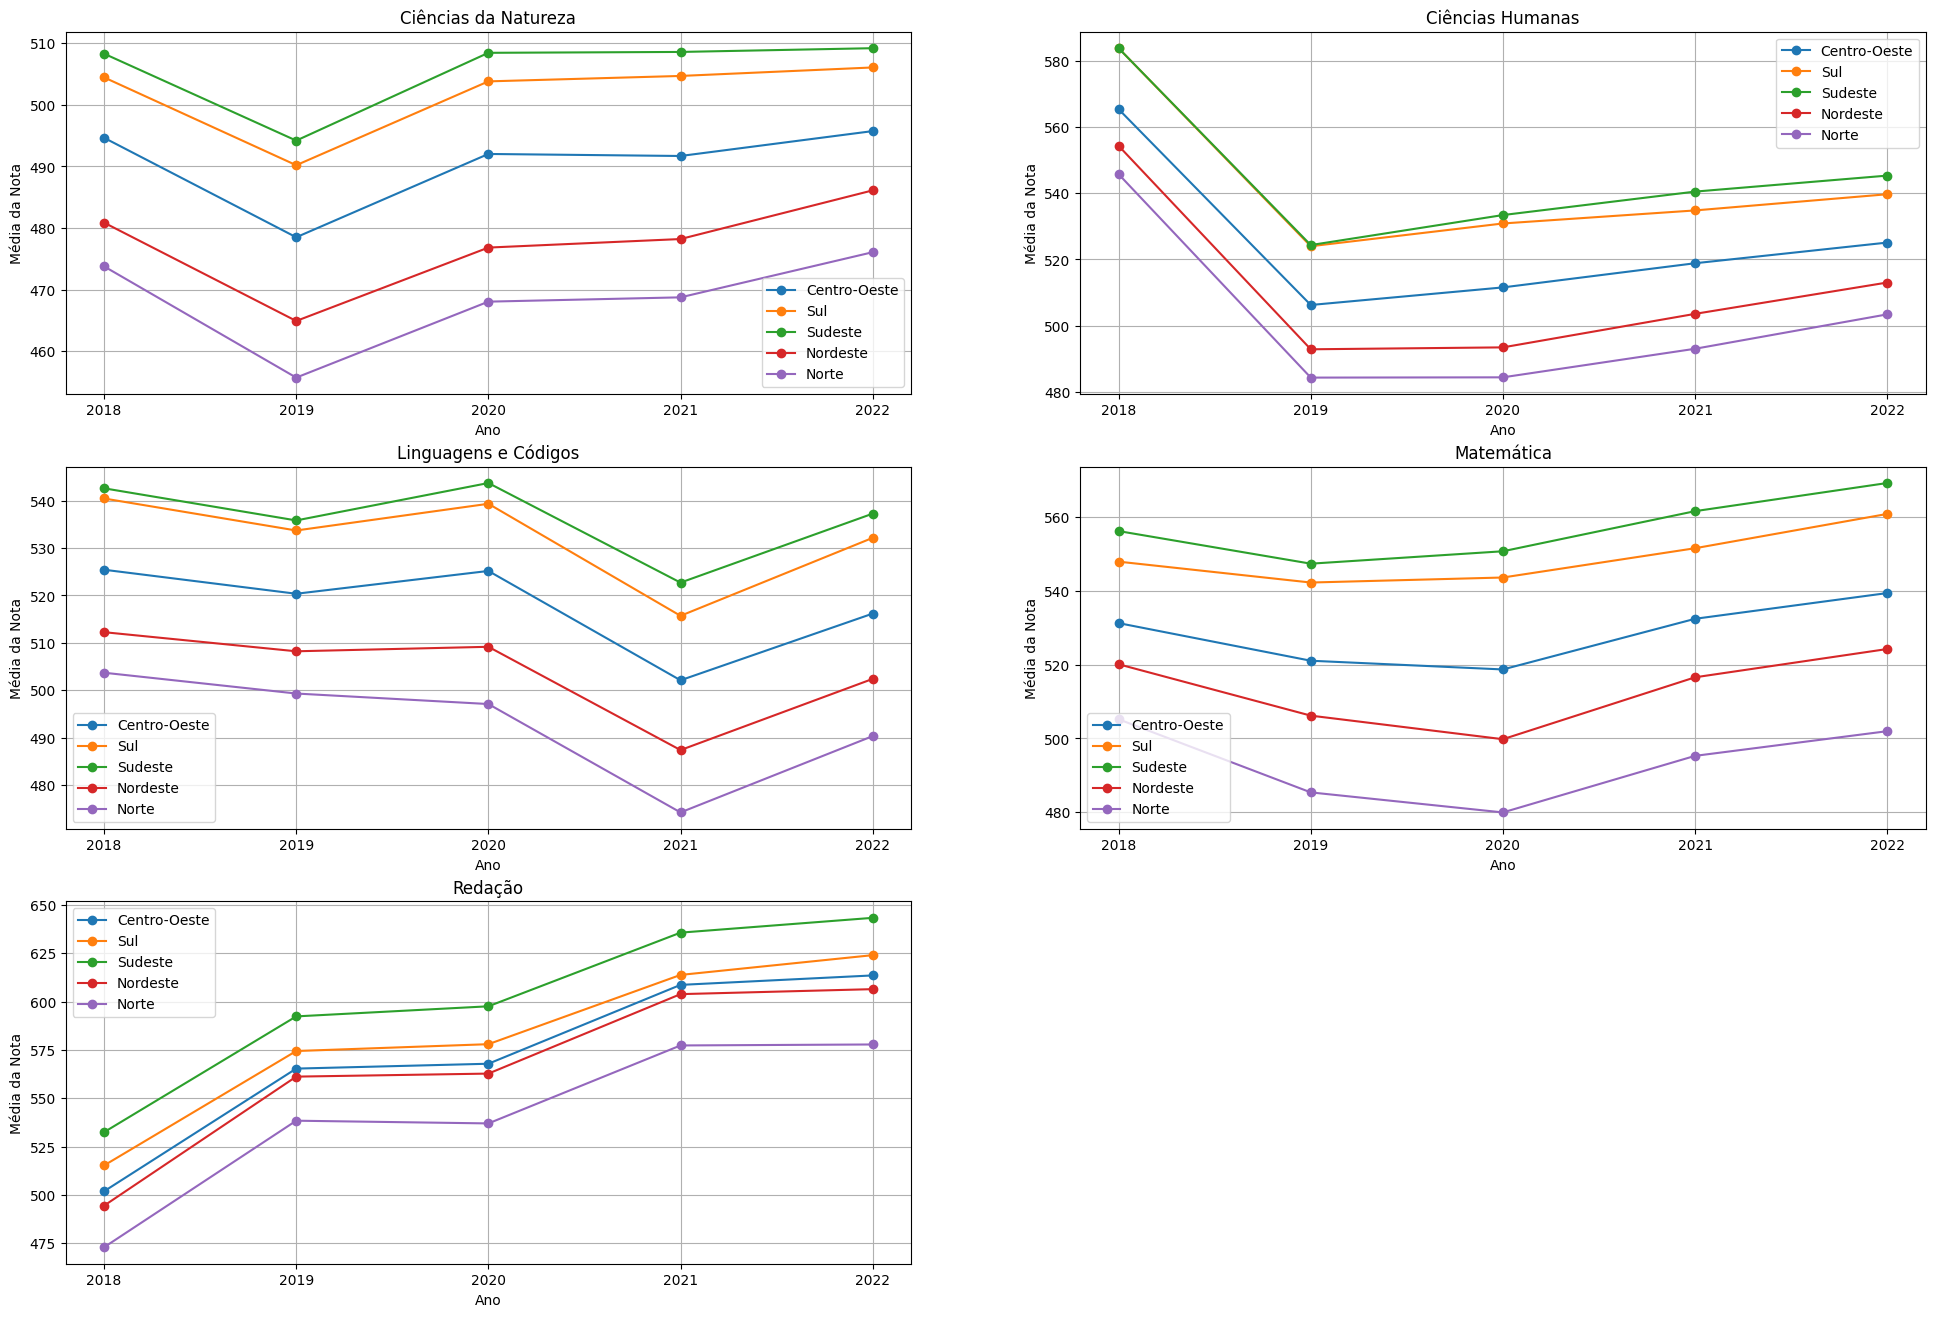

In [7]:
# Lista das áreas de conhecimento
areas_conhecimento = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

# Configurações do layout de subplot
num_linhas = 3
num_colunas = 2

# Gerar os axs que serão o total de num_linhas*num_colunas = 6
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(24, 16))

# Loop para iterar entre as áreas de conhecimento (Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e Redação) presentes no dicionário dados_notas.
for i, (area, notas_regioes) in enumerate(dados_notas.items()):
    linha = i // num_colunas
    coluna = i % num_colunas
    ax = axs[linha, coluna]
    for regiao, notas_regiao in notas_regioes.items():  
        ax.plot(anos, notas_regiao, marker='o', label=regiao)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Média da Nota')
    ax.set_title(area)
    ax.grid(True)
    ax.legend()

# Deleta o último gráfico que está em branco já que foi utilizado apenas 5 de 6 plots gerados por plt.subplots(num_linhas, num_colunas, figsize=(24, 10))
plt.delaxes(axs.flatten()[5])


# Mapa de calor

Aqui fizemos um mapa de calor representando as médias por estado, onde é possível confirmar a autenticidade dos gráficos anteriores, mostrando que o sul e sudeste tem as médias predominantemente maiores do que no resto do país.

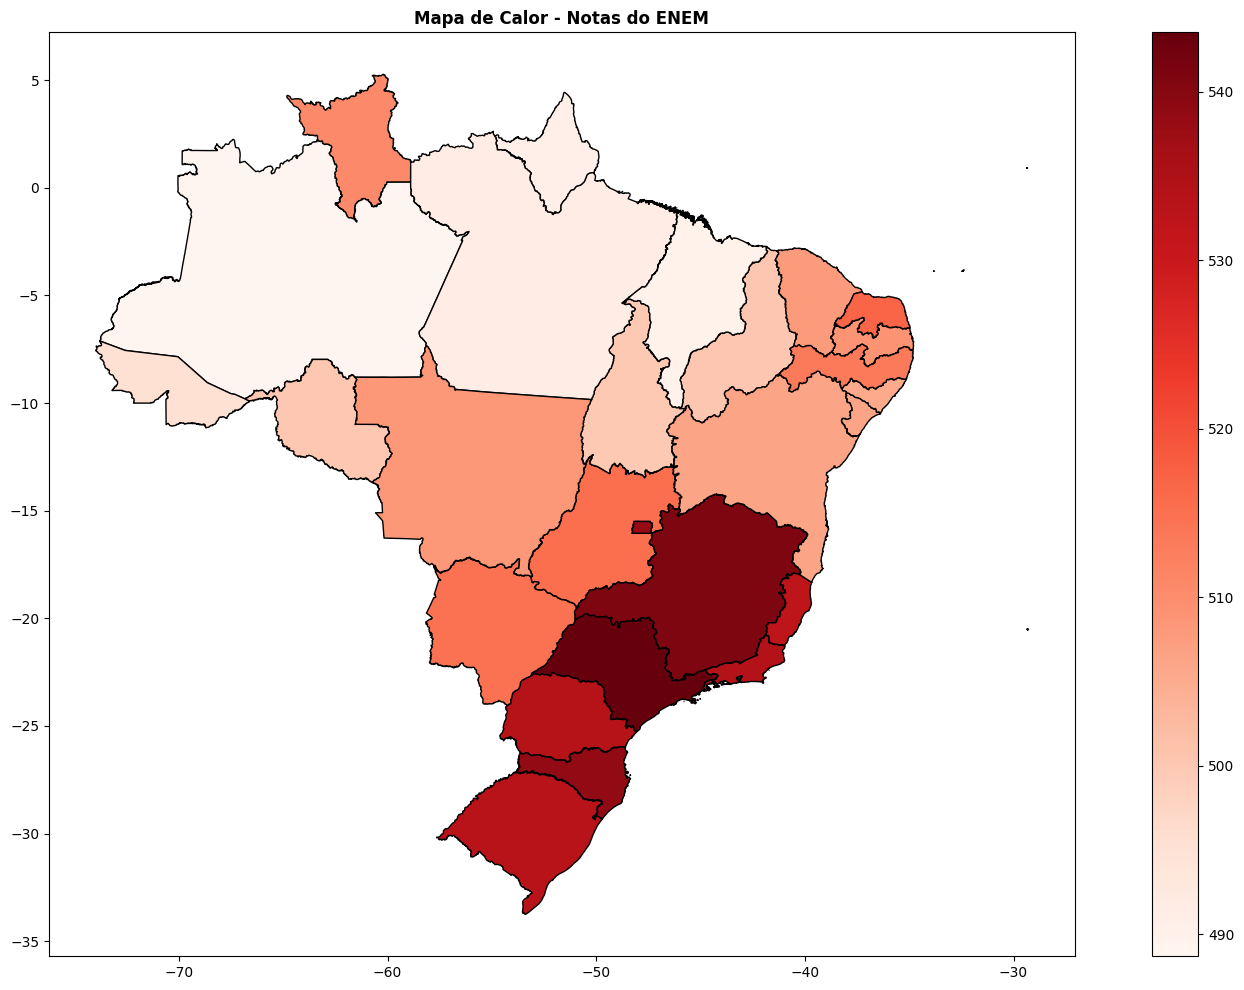

In [9]:
# Lista dos nomes das colunas que representam as notas de cada área de conhecimento
areas_conhecimento = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

# Como os resultados anteriores mostraram que as regiões seguiram o mesmo padrão durante os anos, decidimos fazer apenas um mapa de calor utilizando o datafram: microdados2022
media_notas_por_regiao = microdados2022.groupby('SG_UF_PROVA')[areas_conhecimento].mean()

# Cria uma nova coluna com nota média por área de conhecimento
media_notas_por_regiao['NU_NOTA_MEDIA'] = media_notas_por_regiao[areas_conhecimento].mean(axis=1)

# Aquivo gpkg(GeoPackage) disponibilizados pelo IBGE que possibilitam assimilar dados às unidades federativas do Brasil e assim gerar um mapa de calor
BASES_CARTOGRAFICAS = gpd.read_file('/content/Microdados/bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')
BASES_CARTOGRAFICAS.rename({'sigla': 'SG_UF_PROVA'}, axis = 1, inplace = True)

# Da um merge entre BASES_CARTOGRAFICAS e media_notas_por_regiao, assim obteremos o dataframe "Brasil" que possibilita o plot de um mapa de calor.
Brasil = BASES_CARTOGRAFICAS.merge(media_notas_por_regiao, on = 'SG_UF_PROVA', how = 'left')

ax = Brasil.plot(column='NU_NOTA_MEDIA', cmap='Reds', figsize=(20,12), legend=True, edgecolor='Black')

ax.set_title('Mapa de Calor - Notas do ENEM', fontweight='bold')

plt.show()


# Maiores médias por área de conhecimento em cada ano

Também separamos as maiores notas em cada área de conhecimento, onde pudemos notar que São Paulo liderou praticamente todos os anos desde 2018. Apenas as notas de redação foram lideradas por Minas Gerais, o que mostra um bom indício de que a preparação nas escolas mineiras para a realização de redações são de alta qualidade. Além disso, é possível concluir que as áreas que refletem ter educações precárias são predominantemente da região norte do país.

In [10]:
areas_conhecimento = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
anos = ['2018', '2019', '2020', '2021', '2022']
melhores_medias = []
piores_medias = []

for ano in anos:
  # Passa por todos os 5 anos dos dataframes de microdados
  microdados = eval(f'microdados{ano}')

  # Agrupa os dados pela UF e calcula a média de acordo com as áreas de conhecimento
  media_notas_por_regiao = microdados.groupby('SG_UF_PROVA')[areas_conhecimento].mean()

  for column in media_notas_por_regiao.columns:
    # Armazena os dados(UF e Nota) dos valores máximos 
    uf_max = media_notas_por_regiao[column].idxmax()
    nota_max = round(media_notas_por_regiao[column].max(), 2)
    melhores_medias.append([ano, uf_max, nota_max, column])

    # Armazena os dados(UF e Nota) dos valores máximos 
    uf_min = media_notas_por_regiao[column].idxmin()
    nota_min = round(media_notas_por_regiao[column].min(), 2)
    piores_medias.append([ano,uf_min, nota_min, column])


In [11]:
AC_map = {
  'NU_NOTA_CH': 'Ciências Humanas',
  'NU_NOTA_CN': 'Ciências da Natureza',
  'NU_NOTA_LC': 'Linguagens e Códigos',
  'NU_NOTA_MT': 'Matemática',
  'NU_NOTA_REDACAO': 'Redação'
}

df_max = pd.DataFrame(melhores_medias, columns=['Ano', 'UF', 'Nota', 'Area_Conhecimento'])
df_max['Area_Conhecimento'] = df_max['Area_Conhecimento'].map(AC_map)
df_min = pd.DataFrame(piores_medias, columns=['Ano', 'UF', 'Nota', 'Area_Conhecimento'])
df_min['Area_Conhecimento'] = df_min['Area_Conhecimento'].map(AC_map)

tabela_max = df_max.pivot_table(index='Area_Conhecimento', columns='Ano', values=['UF'], aggfunc='first')
tabela_min = df_min.pivot_table(index='Area_Conhecimento', columns='Ano', values=['UF'], aggfunc='first')

display(tabela_max)
display(tabela_min)

UF                    
Ano                  2018 2019 2020 2021 2022
Area_Conhecimento                            
Ciências Humanas       SC   SP   SP   SP   SP
Ciências da Natureza   SP   SP   SP   SP   DF
Linguagens e Códigos   SP   SP   SP   SP   SP
Matemática             SP   SP   SP   SP   MG
Redação                MG   RJ   MG   MG   MG

UF                    
Ano                  2018 2019 2020 2021 2022
Area_Conhecimento                            
Ciências Humanas       TO   MA   MA   AM   MA
Ciências da Natureza   AC   AP   AP   AM   AM
Linguagens e Códigos   TO   MA   AM   AM   MA
Matemática             AC   AP   AP   AM   AP
Redação                RO   AM   RR   AM   AM

# Relação entre desempenho por área de conhecimento e renda familiar
É possível notar que a renda familiar influencia diretamente no desempenho de de certas matérias, sendo que quanto maior a renda, matérias como matemática se sobressaem quanto as outras e, nas classes mais humildes, matérias como ciências humanas é a que mais tem proveito. Isso pode ser consequência do tipo de educação que os estudantes tiveram (pública x privada).

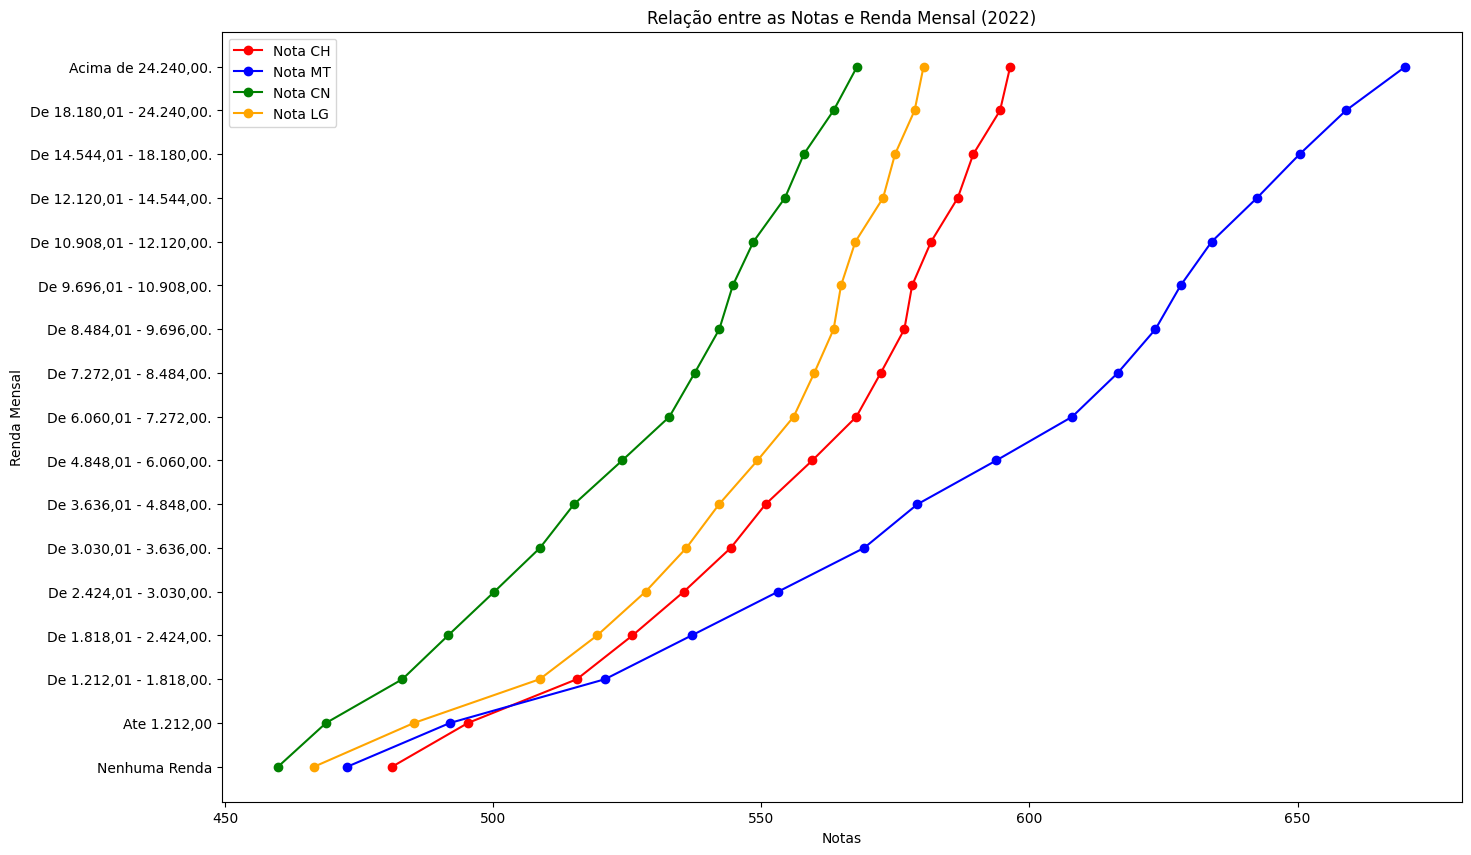

In [12]:
# Agrupando os dados por "Q006" e calculando a média de cada coluna para cada grupo
df_grouped = microdados2022.groupby("Q006")[["NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_LC"]].mean().reset_index()

# Ordenando os valores de "Q006" em ordem alfabética
df_grouped = df_grouped.sort_values(by="Q006")

# Configurando as colunas e cores para o gráfico
columns = ["NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_LC"]
colors = ["red", "blue", "green", "orange"]
labels = ["Nota CH", "Nota MT", "Nota CN", "Nota LG"]

# Mapeando os valores no eixo y
y_values_mapping = {
    "A": "Nenhuma Renda",
    "B": "Ate 1.212,00",
    "C": "De 1.212,01 - 1.818,00.",
    "D": "De 1.818,01 - 2.424,00.",
    "E": "De 2.424,01 - 3.030,00.",
    "F": "De 3.030,01 - 3.636,00.",
    "G": "De 3.636,01 - 4.848,00.",
    "H": "De 4.848,01 - 6.060,00.",
    "I": "De 6.060,01 - 7.272,00.",
    "J": "De 7.272,01 - 8.484,00.",
    "K": "De 8.484,01 - 9.696,00.",
    "L": "De 9.696,01 - 10.908,00.",
    "M": "De 10.908,01 - 12.120,00.",
    "N": "De 12.120,01 - 14.544,00.",
    "O": "De 14.544,01 - 18.180,00.",
    "P": "De 18.180,01 - 24.240,00.",
    "Q": "Acima de 24.240,00.",
    # Mapeie os valores restantes conforme necessário
}

# Substituindo os valores no DataFrame
df_grouped["Q006"] = df_grouped["Q006"].map(y_values_mapping)

fig, ax = plt.subplots(figsize=(16, 10))

# Criando o gráfico de linha
for i, column in enumerate(columns):
    ax.plot(df_grouped[column], df_grouped["Q006"], label=labels[i], color=colors[i], marker="o")

# Configurando os rótulos dos eixos
ax.set_xlabel("Notas")
ax.set_ylabel("Renda Mensal")

# Adicionando uma legenda
ax.legend()
ax.set_title("Relação entre as Notas e Renda Mensal (2022)")


# Mostrando o gráfico
plt.show()

# Escola pública x privada

Analisando separadamente cada tipo de dependência administrativa nas escolas foi possível notar que todas elas seguem um mesmo padrão para cada área de conhecimento. Entretanto, há uma diferença gritante entre as médias de escolas estaduais e municipais para as escolas privadas e federais. Também foi possível concluir que o melhor tipo de educação pública é de escolas federais.

In [13]:
microdados2022 = pd.read_csv('/content/Microdados/MICRODADOS_ENEM_2022.csv', sep=';', encoding='latin1', usecols=colunas_uteis)

<ipython-input-14-b765db4b45e9>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(coluna_nu_idade.index, rotation=45, ha='right')


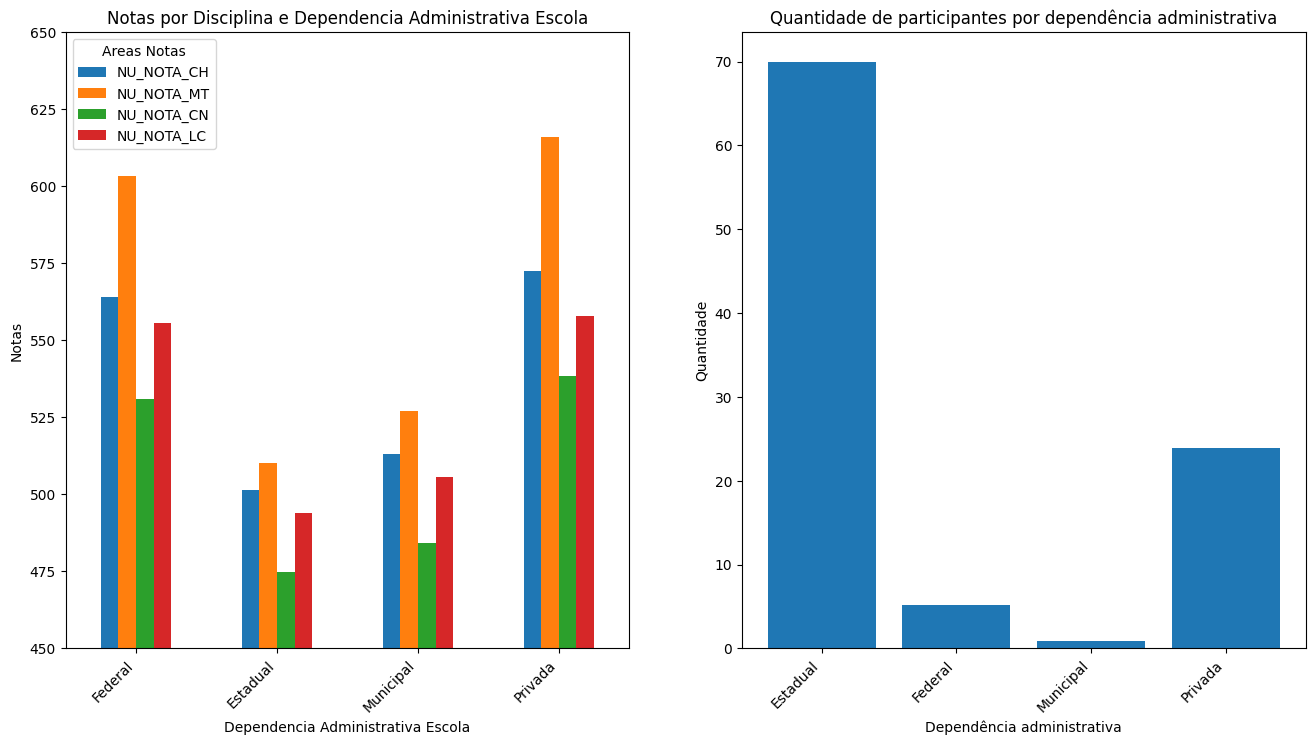

In [14]:
media_notas = microdados2022.groupby('TP_DEPENDENCIA_ADM_ESC')[["NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_LC"]].mean().reset_index()
data = microdados2022
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Mapeando os valores no eixo x
x_values_mapping = {
    1: "Federal",
    2: "Estadual",
    3: "Municipal",
    4: "Privada",
}

# Substituindo os valores no DataFrame
media_notas["TP_DEPENDENCIA_ADM_ESC"] = media_notas["TP_DEPENDENCIA_ADM_ESC"].map(x_values_mapping)

#Criando o gráfico de barras
media_notas.plot(x='TP_DEPENDENCIA_ADM_ESC', kind='bar', ax=axs[0])
# Configurando os rótulos dos eixos
axs[0].set_ylabel('Notas')
axs[0].set_xlabel('Dependencia Administrativa Escola')
# Configurando o gitulo e a legenda
axs[0].set_title('Notas por Disciplina e Dependencia Administrativa Escola')
axs[0].legend(title='Areas Notas')
# Configurando limites
axs[0].set_xticklabels(media_notas.TP_DEPENDENCIA_ADM_ESC, rotation=45, ha='right')
axs[0].set_ylim(450, 650) 

# ---------
# Substituindo os valores no DataFrame
data['TP_DEPENDENCIA_ADM_ESC'] = data['TP_DEPENDENCIA_ADM_ESC'].map(x_values_mapping)

# Calculando a porcentagem de estudantes
coluna_nu_idade = microdados2022['TP_DEPENDENCIA_ADM_ESC'].value_counts().sort_index()
coluna_nu_idade = coluna_nu_idade.div(len(microdados2022['TP_DEPENDENCIA_ADM_ESC'].dropna())) * 100

#Criando o gráfico de barras
rects = plt.bar(coluna_nu_idade.index, coluna_nu_idade)

axs[1].set_xticklabels(coluna_nu_idade.index, rotation=45, ha='right')

# Configurando os rótulos dos eixos
axs[1].set_xlabel("Dependência administrativa")
axs[1].set_ylabel("Quantidade")
axs[1].set_title("Quantidade de participantes por dependência administrativa")
plt.show()